In [2]:
import pandas as pd
import warnings

warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")

In [4]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
df.shape

(7860037, 22)

In [6]:
print("Percentage of missing values in the columns:\n",(df.isna().sum()/df.shape[0])*100)

Percentage of missing values in the columns:
 ID                      0.000000
Case Number             0.000038
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.137862
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000598
Ward                    7.822470
Community Area          7.804989
FBI Code                0.000000
X Coordinate            1.123672
Y Coordinate            1.123672
Year                    0.000000
Updated On              0.000000
Latitude                1.123672
Longitude               1.123672
Location                1.123672
dtype: float64


In [7]:
df.isna().sum()   #we can simply drop the missing values related to location data or we can try retrive using geocoding apis from google

ID                           0
Case Number                  3
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10836
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Community Area          613475
FBI Code                     0
X Coordinate             88321
Y Coordinate             88321
Year                         0
Updated On                   0
Latitude                 88321
Longitude                88321
Location                 88321
dtype: int64

In [8]:
columns_with_missing = ['Location Description', 'Ward', 'Community Area','Latitude', 'Longitude', 'Location','X Coordinate','Y Coordinate']
df = df.dropna(subset=columns_with_missing)

In [9]:
print("Percentage of missing values in the columns after dropping na's:\n",(df.isna().sum()/df.shape[0])*100)

Percentage of missing values in the columns after dropping na's:
 ID                      0.000000
Case Number             0.000028
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.000000
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000657
Ward                    0.000000
Community Area          0.000000
FBI Code                0.000000
X Coordinate            0.000000
Y Coordinate            0.000000
Year                    0.000000
Updated On              0.000000
Latitude                0.000000
Longitude               0.000000
Location                0.000000
dtype: float64


In [10]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [11]:
df.shape

(7158108, 22)

In [12]:
primary_type_count = df.groupby('Primary Type').size().sort_values(ascending=False)[:10]

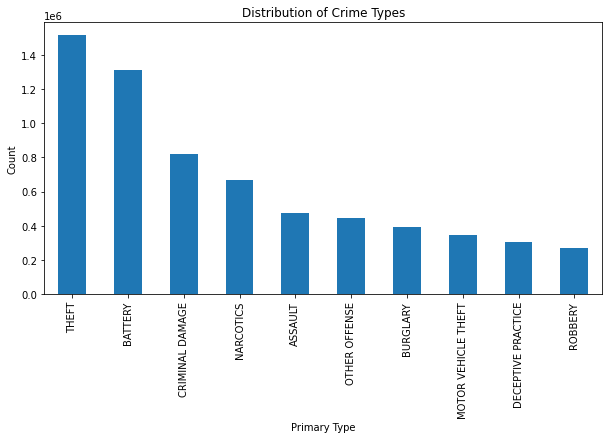

In [13]:
import matplotlib.pyplot as plt
primary_type_count.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Distribution of Crime Types')
plt.show()

In [14]:
df.Date

6          09/03/2015 06:00:00 PM
11         09/05/2015 10:42:00 PM
15         09/06/2015 01:10:00 AM
17         09/06/2015 02:00:00 AM
23         09/06/2015 02:35:00 AM
                    ...          
7860032    06/21/2023 08:00:00 PM
7860033    06/06/2023 03:42:00 PM
7860034    06/28/2023 06:00:00 PM
7860035    05/13/2023 12:00:00 PM
7860036    06/20/2023 04:00:00 AM
Name: Date, Length: 7158108, dtype: object

In [15]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [16]:
df['Date'] = pd.to_datetime(df['Date'])


In [17]:
df['Year'] = df['Date'].dt.year


In [18]:
df['Month'] = df['Date'].dt.month
df['Month'].nunique()

12

In [19]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,39.0,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",9
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,3.0,24,1170563.0,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",9


In [20]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
7860032,13128007,JG325985,2023-06-21 20:00:00,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,21.0,14,1157169.0,1920611.0,2023,08/05/2023 04:45:54 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)",6
7860033,13128066,JG325838,2023-06-06 15:42:00,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,25.0,17,1140792.0,1911954.0,2023,08/05/2023 04:45:54 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)",6
7860034,13129823,JG328250,2023-06-28 18:00:00,059XX S KEELER AVE,0810,THEFT,OVER $500,STREET,False,False,...,65.0,06,1149387.0,1864869.0,2023,08/05/2023 04:45:54 PM,41.785118,-87.727828,"(41.785117789, -87.727827896)",6
7860035,13128324,JG326502,2023-05-13 12:00:00,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,31.0,10,1163211.0,1889404.0,2023,08/05/2023 04:45:54 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)",5
7860036,13129172,JG327619,2023-06-20 04:00:00,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,21.0,08B,1158868.0,1918755.0,2023,08/05/2023 04:45:54 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)",6


In [21]:
df['Year'].unique()

array([2015, 2013, 2019, 2014, 2010, 2020, 2017, 2011, 2016, 2023, 2021,
       2018, 2022, 2012, 2009, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008], dtype=int64)

In [22]:
df = df.reset_index(drop=True)

In [23]:
df.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
0,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,39.0,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",9
1,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,3.0,24,1170563.0,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",9
2,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,...,38.0,04B,1177070.0,1873609.0,2015,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",9


In [24]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month'],
      dtype='object')

In [25]:
type_counts = df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')


In [26]:
type_counts

,Year,Primary Type,Count
0,2001,ARSON,4
1,2001,ASSAULT,46
2,2001,BATTERY,151
3,2001,BURGLARY,50
4,2001,CRIM SEXUAL ASSAULT,128
...,...,...,...
705,2023,ROBBERY,5472
706,2023,SEX OFFENSE,748
707,2023,STALKING,276
708,2023,THEFT,31016


In [27]:
top_types = type_counts.groupby('Primary Type')['Count'].sum().sort_values(ascending=False).head(5).index


In [28]:
filtered_type_counts = type_counts[type_counts['Primary Type'].isin(top_types)]


In [29]:
pivot_table = filtered_type_counts.pivot(index='Year', columns='Primary Type', values='Count')


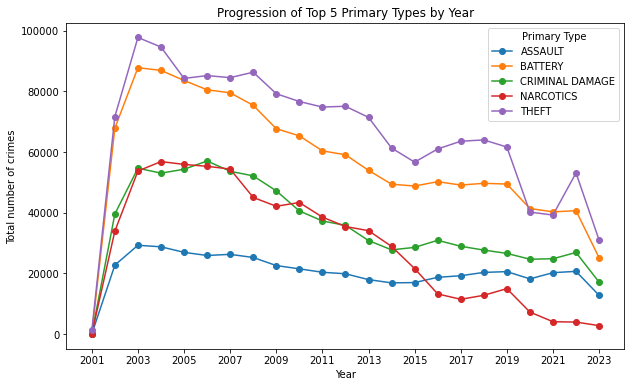

In [30]:
# Plot the data
ax = pivot_table.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Progression of Top 5 Primary Types by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total number of crimes')
ax.legend(title='Primary Type')
ax.grid(False)  
plt.xticks(range(min(pivot_table.index), max(pivot_table.index) + 1, 2))
plt.show()

In [31]:
street_crimes = df[df['Location Description'] == 'STREET'].shape[0]


In [32]:
total_crimes = df.shape[0]


In [33]:
fraction_street = street_crimes / total_crimes
fraction_street

0.25811625083052675

In [34]:
grouped = df.groupby(['Year', 'Location Description']).size().unstack().fillna(0)


In [35]:
grouped['Fraction Street'] = grouped['STREET'] / grouped.sum(axis=1)


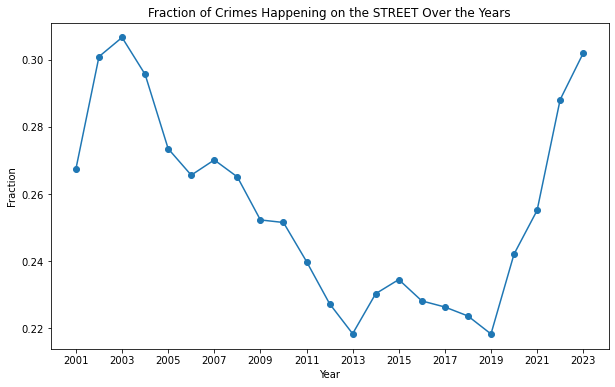

In [36]:
ax = grouped['Fraction Street'].plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Fraction of Crimes Happening on the STREET Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Fraction')
ax.grid(False)  # Disable grid lines

# Set x-axis ticks to show years with a step of 2
plt.xticks(range(min(grouped.index), max(grouped.index) + 1, 2))

plt.show()

In [37]:
residence_crimes = df[df['Location Description'] == 'RESIDENCE'].shape[0]


In [38]:
fraction_residence = residence_crimes / total_crimes
fraction_residence

0.164063045709844

In [39]:
grouped['Fraction Residence'] = grouped['RESIDENCE'] / grouped.sum(axis=1)


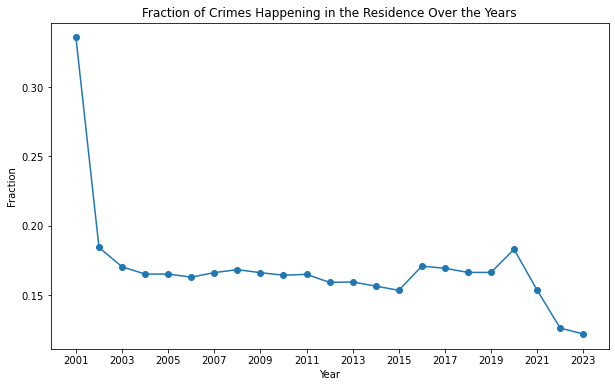

In [40]:
ax = grouped['Fraction Residence'].plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Fraction of Crimes Happening in the Residence Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Fraction')
ax.grid(False) 
plt.xticks(range(min(grouped.index), max(grouped.index) + 1, 2))
plt.show()

In [43]:
import seaborn as sns


<AxesSubplot:xlabel='count', ylabel='Location Description'>

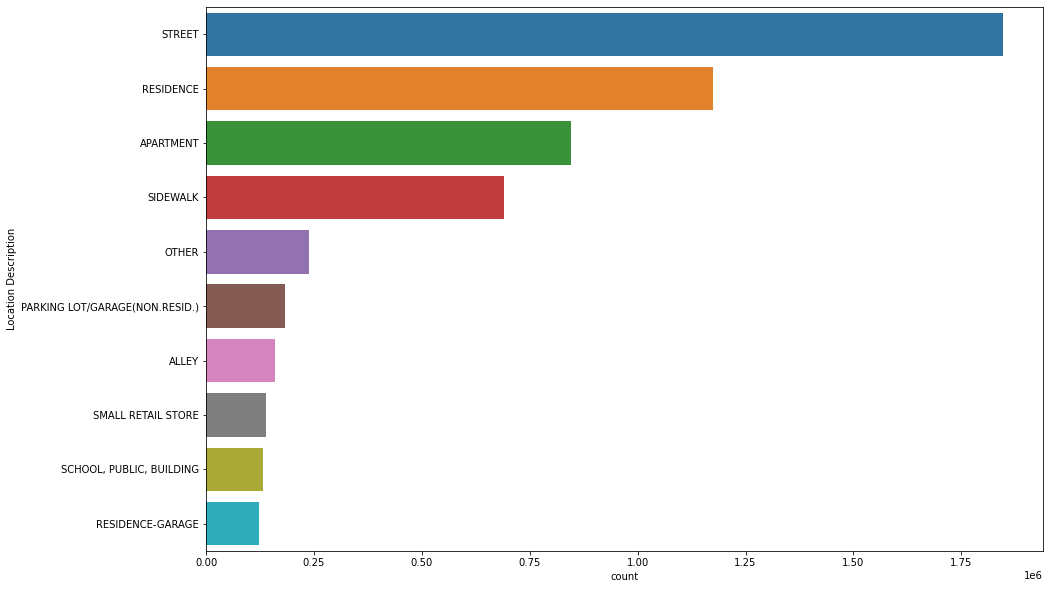

In [44]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

In [48]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
0,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,39.0,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",9
1,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,3.0,24,1170563.0,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",9
2,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,...,38.0,04B,1177070.0,1873609.0,2015,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",9
3,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,27.0,04B,1153006.0,1901570.0,2015,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",9
4,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,...,6.0,22,1166847.0,1924028.0,2015,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158103,13128007,JG325985,2023-06-21 20:00:00,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,21.0,14,1157169.0,1920611.0,2023,08/05/2023 04:45:54 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)",6
7158104,13128066,JG325838,2023-06-06 15:42:00,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,25.0,17,1140792.0,1911954.0,2023,08/05/2023 04:45:54 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)",6
7158105,13129823,JG328250,2023-06-28 18:00:00,059XX S KEELER AVE,0810,THEFT,OVER $500,STREET,False,False,...,65.0,06,1149387.0,1864869.0,2023,08/05/2023 04:45:54 PM,41.785118,-87.727828,"(41.785117789, -87.727827896)",6
7158106,13128324,JG326502,2023-05-13 12:00:00,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,31.0,10,1163211.0,1889404.0,2023,08/05/2023 04:45:54 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)",5


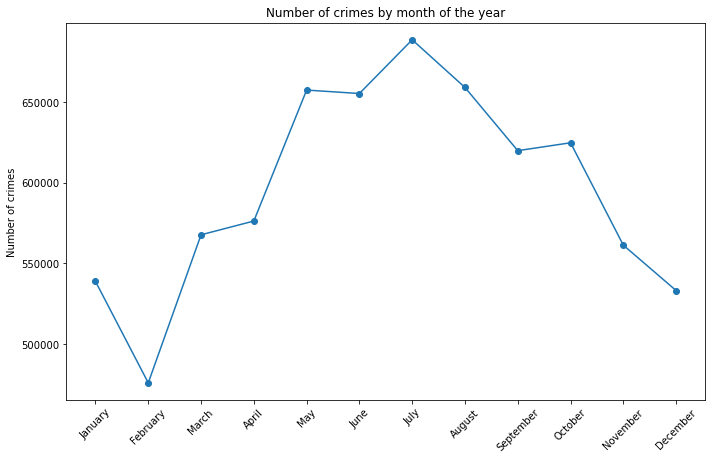

In [59]:
month_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
months = [calendar.month_name[i] for i in month_counts.index]
plt.plot(months, month_counts, marker='o')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()